In [1]:
%load_ext autoreload
%autoreload 2

In [8]:
import numpy as np
import itertools

In [3]:
test_positions = '''<x=-8, y=-10, z=0>
<x=5, y=5, z=10>
<x=2, y=-7, z=3>
<x=9, y=-8, z=-3>'''

In [4]:
in_positions = '''<x=6, y=10, z=10>
<x=-9, y=3, z=17>
<x=9, y=-4, z=14>
<x=4, y=14, z=4>'''

In [33]:
class moon:
    def __init__(self, pos, vel = np.array([0, 0, 0]), name=None):
        
        self.pos = np.array(pos)
        self.vel = vel
        self.name = name
    
    def kinetic_energy(self):
        return np.linalg.norm(self.vel, 1)

    def potential_energy(self):
        return np.linalg.norm(self.pos, 1)
    
    def total_energy(self):
        return self.potential_energy()*self.kinetic_energy()
    
    def gravity(self, other):
        r1 = self.pos
        r2 = other.pos
        
        rel_vel = 1*(r2 > r1) -1*(r2 < r1) + 0*(r1 == r2)
        self.vel = self.vel + rel_vel
        other.vel = other.vel - rel_vel
    
    def step_time(self):
        self.pos = self.pos + self.vel
    
    def __repr__(self):
        return 'pos: {}, vel {}, total energy: {}'.format(self.pos, self.vel, self.total_energy())

In [51]:
def get_names():
    yield 'io'
    yield 'eu'
    yield 'ga'
    yield 'ca'

In [52]:
def moons_from_vectors(vectors_str):
    names = get_names()
    
    vectors = vectors_str.split('\n')
    moons = []
    for pos_str in vectors:
        pos_str = pos_str[1:-1]
        pos = np.array([0, 0, 0])
        split_pos = pos_str.split(',')
        pos[0] = int(split_pos[0].split('=')[1])
        pos[1] = int(split_pos[1].split('=')[1])
        pos[2] = int(split_pos[2].split('=')[1])
        moons.append(moon(pos, name=next(names)))
    
    return moons

In [53]:
moons = moons_from_vectors(in_positions)

## Part I

In [9]:
moons = moons_from_vectors(in_positions)

for dt in range(1000):    
    for moon1, moon2 in itertools.combinations(moons, r=2):
        moon1.gravity(moon2)
    
    for moon_obj in moons:
        moon_obj.step_time()
    

total_energy = 0
for moon_obj in moons:
    total_energy += moon_obj.total_energy()
    
total_energy

13045.0

## Part II

In [29]:
import pandas as pd

In [27]:
test_positions = '''<x=-1, y=0, z=2>
<x=2, y=-10, z=-7>
<x=4, y=-8, z=8>
<x=3, y=5, z=-1>'''

In [47]:
moon_df = pd.DataFrame({'moon': ['io', 'eu', 'ga', 'ca'], 
                        'x': [-1, 2, 4, 3],
                         'y': [0, -10, -8, 5],
                       'z': [2, -7, 8, -1]})

In [48]:
moon_df

,moon,x,y,z
0,io,-1,0,2
1,eu,2,-10,-7
2,ga,4,-8,8
3,ca,3,5,-1


In [65]:
moons = moons_from_vectors(test_positions)

moon_list = ['io', 'eu', 'ga', 'ca']

moon_dfs = []
for dt in range(10):    
    for moon1, moon2 in itertools.combinations(moons, r=2):
        moon1.gravity(moon2)
    
    xlist = []
    ylist = []
    zlist = []
    for moon_obj in moons:
        xlist.append(moon_obj.pos[0])
        ylist.append(moon_obj.pos[1])
        zlist.append(moon_obj.pos[2])
        moon_obj.step_time()
    moon_dfs.append(pd.DataFrame({'moon': ['io', 'eu', 'ga', 'ca'], 
                        'x': xlist,
                         'y': ylist,
                       'z': zlist}))
    

moon_states = pd.concat(moon_dfs, axis=0, ignore_index=True)

In [66]:
moon_states.loc[moon_states.moon == 'io']

,moon,x,y,z
0,io,-1,0,2
4,io,2,-1,1
8,io,5,-3,-1
12,io,5,-6,-1
16,io,2,-8,0
20,io,-1,-9,2
24,io,-1,-7,3
28,io,2,-2,1
32,io,5,2,-2
36,io,5,3,-4


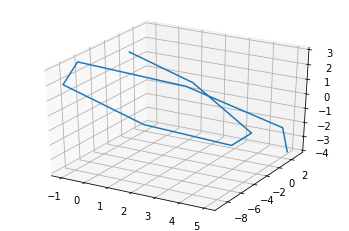

In [67]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

io = moon_states.loc[moon_states.moon == 'io']
Axes3D.plot(ax, io.x, io.y, io.z)


In [13]:
xs = [0, 0, 0, 0, 1]
ys = [5, 4, 3, 2, 1]

In [22]:
plt.show()

AttributeError: 'Axes3DSubplot' object has no attribute 'show'